In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [2]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
filename = 'example.jpg'
gluoncv.utils.download(url, filename)

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 266.01KB/s]


'example.jpg'

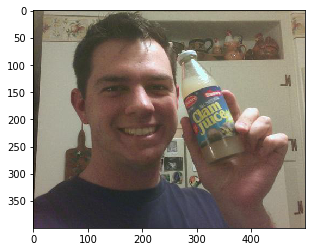

In [3]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [4]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [5]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True)

100121KB [00:39, 2540.95KB/s]                                                                                          


197333KB [01:33, 2110.92KB/s]                                                                                          


In [6]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [7]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

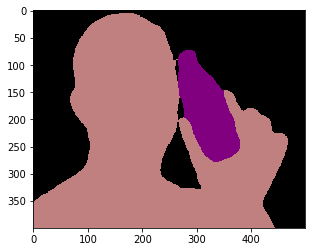

In [8]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()